In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import scipy.optimize as optimization

In [2]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
start_date = '2012-01-01'
end_date = '2021-01-01'

def download_data():
    stock_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start= start_date, end = end_date)['Close']
    return pd.DataFrame(stock_data)


if __name__ =='__main__':
    
    print(download_data())

                                 AAPL         WMT        TSLA         GE  \
Date                                                                       
2012-01-03 00:00:00-05:00   12.500193   46.962864    1.872000  86.152092   
2012-01-04 00:00:00-05:00   12.567370   46.480209    1.847333  87.090591   
2012-01-05 00:00:00-05:00   12.706892   46.254475    1.808000  87.043655   
2012-01-06 00:00:00-05:00   12.839726   45.927528    1.794000  87.512894   
2012-01-09 00:00:00-05:00   12.819360   46.067654    1.816667  88.498291   
...                               ...         ...         ...        ...   
2020-12-24 00:00:00-05:00  130.205765  138.500000  220.589996  65.955902   
2020-12-28 00:00:00-05:00  134.862686  140.160080  221.229996  65.893982   
2020-12-29 00:00:00-05:00  133.067017  139.272125  221.996674  65.398529   
2020-12-30 00:00:00-05:00  131.932404  139.156296  231.593338  66.327499   
2020-12-31 00:00:00-05:00  130.916153  139.127335  235.223328  66.884865   

           

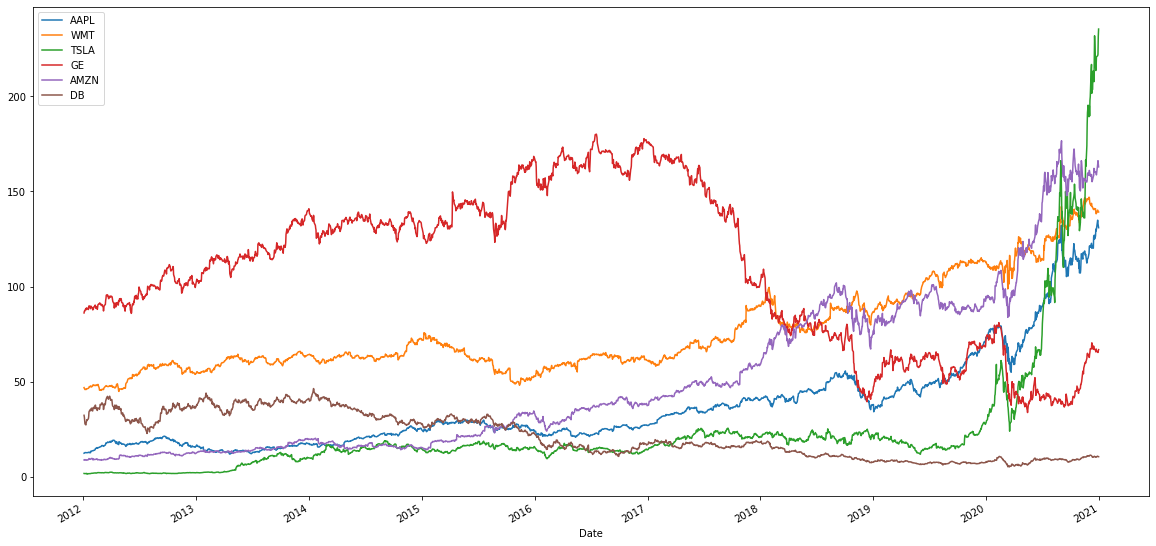

In [3]:
def show_data(data):
    data.plot(figsize=(20,10))
    plt.show()
    
if __name__ =='__main__':
    
    dataset = download_data()
    show_data(dataset)

In [4]:
def calculate_return(data):
# Reason for logarithmic return rather than normal return is to tackle normalization so that all are comparable
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

if __name__ =='__main__':
    
    dataset = download_data()
    log_daily_return = calculate_return(dataset) 

In [5]:
print(log_daily_return)

                               AAPL       WMT      TSLA        GE      AMZN  \
Date                                                                          
2012-01-04 00:00:00-05:00  0.005360 -0.010330 -0.013264  0.010834 -0.008526   
2012-01-05 00:00:00-05:00  0.011041 -0.004869 -0.021522 -0.000539  0.000563   
2012-01-06 00:00:00-05:00  0.010399 -0.007093 -0.007773  0.005377  0.027763   
2012-01-09 00:00:00-05:00 -0.001587  0.003046  0.012556  0.011197 -0.022428   
2012-01-10 00:00:00-05:00  0.003574 -0.002368  0.013486 -0.007451  0.004359   
...                             ...       ...       ...       ...       ...   
2020-12-24 00:00:00-05:00  0.007683  0.001953  0.024150 -0.019527 -0.003957   
2020-12-28 00:00:00-05:00  0.035141  0.011915  0.002897 -0.000939  0.034470   
2020-12-29 00:00:00-05:00 -0.013404 -0.006355  0.003460 -0.007547  0.011517   
2020-12-30 00:00:00-05:00 -0.008563 -0.000832  0.042321  0.014104 -0.010942   
2020-12-31 00:00:00-05:00 -0.007733 -0.000208  0.015

In [6]:
NUM_Trading_days = 252
def show_statistics(returns):
    #mean of annual returns, 252 being no. of trading days
    print(returns.mean()*NUM_Trading_days)
    print(returns.cov()*NUM_Trading_days)
    
if __name__ =='__main__':
        
        dataset = download_data()
        show_statistics(log_daily_return)

AAPL    0.261440
WMT     0.120883
TSLA    0.538008
GE     -0.028177
AMZN    0.322901
DB     -0.123671
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.082598  0.016772  0.049728  0.028998  0.038190  0.037275
WMT   0.016772  0.038638  0.015757  0.012140  0.014508  0.014886
TSLA  0.049728  0.015757  0.308762  0.037505  0.054810  0.053588
GE    0.028998  0.012140  0.037505  0.103367  0.022303  0.055398
AMZN  0.038190  0.014508  0.054810  0.022303  0.093813  0.034163
DB    0.037275  0.014886  0.053588  0.055398  0.034163  0.154796


In [10]:
def show_mean_variance(returns, weight):
    # Annual return  
    portfolio_return = np.sum(returns.mean()*weights)*NUM_Trading_days
    portfolio_volatility = np.sqrt(np.dot(weight.T ,np.dot(returns.cov()*NUM_Trading_days, weights)))
    print("Expected portfolio mean (return): ",portfolio_return)
    print("Expected portfolio volatility (standard deviation): ",portfolio_volatility)

# Generating different random portfolios
NUM_PORTFOLIOS = 10000

def show_portfolios(returns, volatilities):
    plt.figure(figsize=(20, 8))
    plt.scatter(volatilities, returns, c=returns/volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.show()
def generate_portfolios(returns):
    
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []
 # Generating random weights with sum = 1    
    for _ in range(NUM_PORTFOLIOS):
        w= np.random.random(len(stocks))
        w/= np.sum(w)
        portfolio_weights.append(np.sum(returns.mean()*w)*NUM_Trading_days)
        portfolio_means.append(np.sum(returns.mean()*w)*NUM_Trading_days)
        portfolio_risks.append(np.sqrt(np.dot(w.T ,np.dot(returns.cov()*NUM_Trading_days, w))))
        
    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

if __name__ =='__main__':
        
        dataset = download_data()
        log_daily_return = calculate_return(dataset) 
        show_statistics(log_daily_return)
        
        pweights, means, risks = generate_portfolios(log_daily_return)
  

AAPL    0.261440
WMT     0.120883
TSLA    0.538008
GE     -0.028177
AMZN    0.322901
DB     -0.123671
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.082598  0.016772  0.049728  0.028998  0.038191  0.037275
WMT   0.016772  0.038638  0.015757  0.012140  0.014508  0.014886
TSLA  0.049728  0.015757  0.308762  0.037505  0.054810  0.053588
GE    0.028998  0.012140  0.037505  0.103367  0.022303  0.055398
AMZN  0.038191  0.014508  0.054810  0.022303  0.093813  0.034163
DB    0.037275  0.014886  0.053588  0.055398  0.034163  0.154797


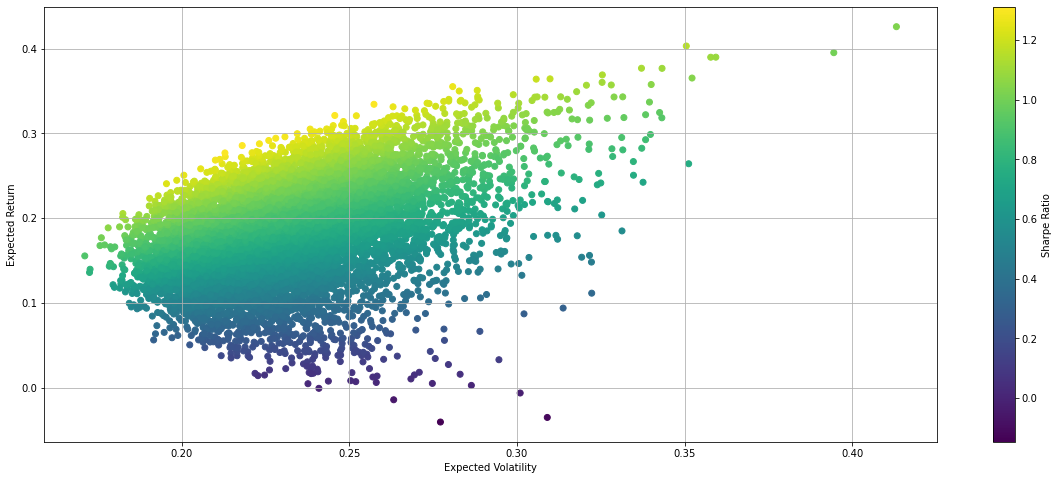

In [11]:
show_portfolios(means, risks)

In [17]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()*weights)*NUM_Trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*NUM_Trading_days, weights)))
    
    return np.array([portfolio_return, portfolio_volatility, portfolio_return/portfolio_volatility])

# scipy optimize module can find the minimum of a given function
# for maximum of a f(x), it is minimum of -f(x)
def min_function_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

def optimize_portfolio(weights, returns):
    # Sum of weights is 1,w-1 = 0
    constraints = ({'type':'eq', 'fun': lambda x: np.sum(x)-1})
    #the weights can be 1 at most
    bounds = tuple((0,1) for _ in range(len(stocks)))
    return optimization.minimize(fun=min_function_sharpe, x0 = weights[0], args= returns, method = 'SLSQP', bounds=bounds, constraints=constraints)

def print_optimal_portfolio(optimum, returns):
        print("optimal portfolio: ", optimum['x'].round(6))
        print("expected return, volatility and Sharpe ratio: ", statistics(optimum['x'].round(3), returns))
        
        
def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
    plt.figure(figsize=(20, 8))
    plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets / portfolio_vols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'g*', markersize=20.0)
    plt.show()
    
    if __name__ =='__main__':
        pweights, means, risks = generate_potfolios(log_daily_return)
        show_portfolios(means, risks)
        optimum = optimize_portfolio(pweights, log_daily_return)
        show_optimal_portfolio(optimum, log_daily_return, means, risks)

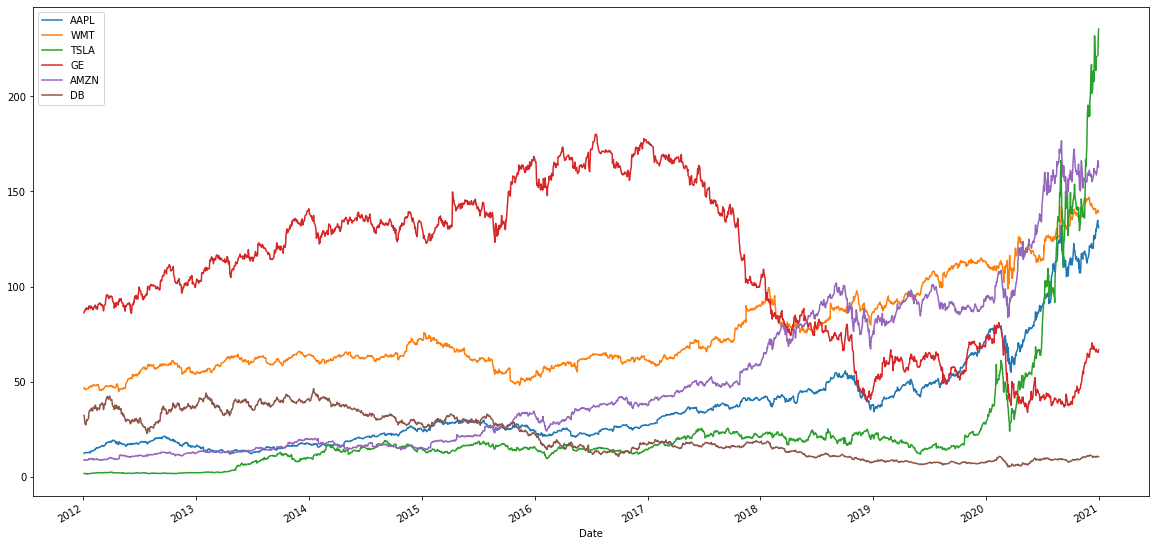

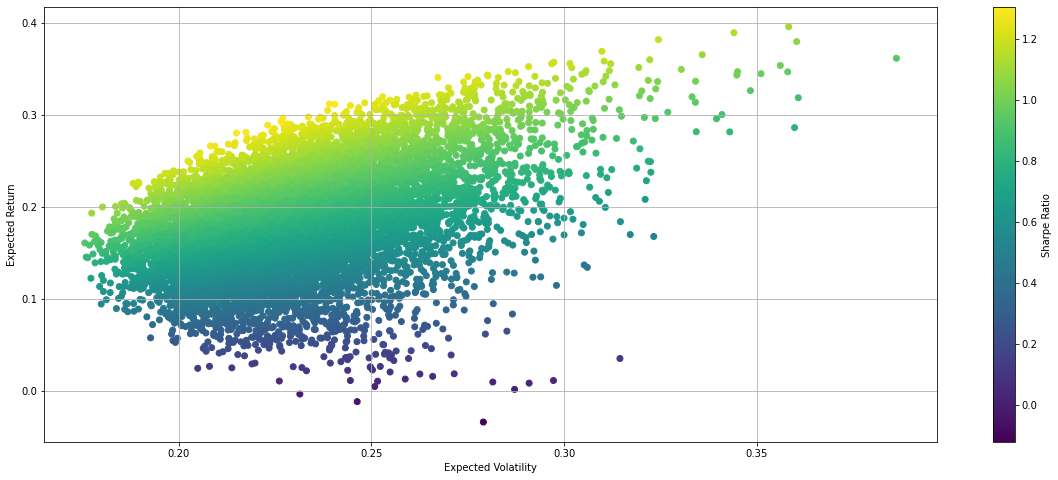

optimal portfolio:  [0.218871 0.232574 0.190112 0.       0.358444 0.      ]
expected return, volatility and Sharpe ratio:  [0.30324142 0.2287772  1.32548791]


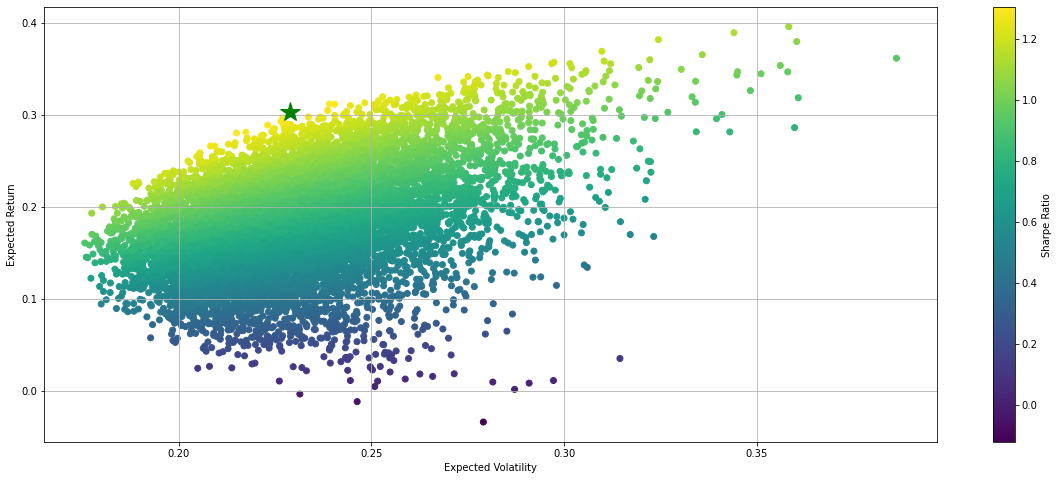

NameError: name 'generate_potfolios' is not defined

In [18]:
if __name__ == '__main__':
    dataset = download_data()
    show_data(dataset)
    log_daily_returns = calculate_return(dataset)
    # show_statistics(log_daily_returns)
    pweights, means, risks = generate_portfolios(log_daily_return)
    show_portfolios(means, risks)
    optimum = optimize_portfolio(pweights, log_daily_returns)
    print_optimal_portfolio(optimum, log_daily_returns)
    show_optimal_portfolio(optimum, log_daily_returns, means, risks)